In [1]:
import sys; sys.path.insert(0, '..') # necessary for successful custom module imports
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from models.jump_vasicek import JumpVasicek
from models.vasicek import Vasicek
from pricing.pricing import Pricing
import warnings
warnings.filterwarnings("ignore")

In [2]:
fitted_params = {
    "kappa": 0.09379583,
    "mu_r": 0.03578758,
    "sigma": 0.01,
    "mu": 0,
    "gamma": 0.01,
    "h": 10
}

In [3]:
xls = pd.ExcelFile('../data/yield_curve15022021.xlsx')
yield_curve = pd.read_excel(xls, 'Sheet1')
yield_curve = yield_curve.set_index('Dates')

In [4]:
yield_curve_2_5_21 = pd.DataFrame((yield_curve[yield_curve.index == '2/5/2021']).T.values/100)
yield_curve_2_5_21['DATE'] = yield_curve.columns
yield_curve_2_5_21.columns = ['YIELD','DATE']

In [5]:
def convert_to_years(row):
    if 'M' in row['DATE']:
        return int(row['DATE'].split('M')[0])/12
    elif 'Y' in row['DATE']:
        return int(row['DATE'].split('Y')[0])
    
yield_curve_2_5_21['YEARS'] = yield_curve_2_5_21.apply(convert_to_years, axis=1)

In [6]:
yield_curve_2_5_21['PRICE'] = np.exp(-yield_curve_2_5_21['YEARS']*yield_curve_2_5_21['YIELD'])
yield_curve_2_5_21 = yield_curve_2_5_21.set_index('DATE')

In [7]:
vasicek = Vasicek(fitted_params)
pricing = Pricing(vasicek)

In [8]:
prices = np.empty(len(yield_curve_2_5_21))
std = np.empty(len(yield_curve_2_5_21))

i = 0
for t in yield_curve_2_5_21['YEARS'].values:
    prices[i] = pricing.bond_price(26, 0.001, 100, t)
    i = i+1

<AxesSubplot:xlabel='DATE'>

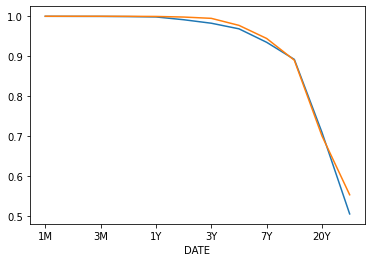

In [9]:
plt.plot(prices)
yield_curve_2_5_21['PRICE'].plot()

In [10]:
fitted_params = {
    "kappa": 0.27190529,
    "mu_r": 0.03017723,
    "sigma": 0.01,
    "mu": 0,
    "gamma": 0.01,
    "h": 10
}

In [11]:
jump_vasicek = JumpVasicek(fitted_params)
jump_pricing = Pricing(jump_vasicek)

In [12]:
prices = np.empty(len(yield_curve_2_5_21))
std = np.empty(len(yield_curve_2_5_21))

i = 0
for t in yield_curve_2_5_21['YEARS'].values:
    prices[i] = jump_pricing.bond_price(26, 0.001, 100, t)
    i = i+1

<AxesSubplot:xlabel='DATE'>

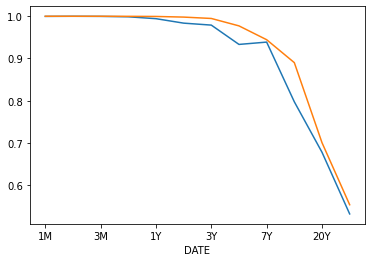

In [13]:
plt.plot(prices)
yield_curve_2_5_21['PRICE'].plot()

In [14]:
jump_pricing.swap_rate(26, 0.001, 100, 2, [0.5, 1])

0.006606866520851697